In [2]:
import pandas as pd
from sklearn.decomposition import PCA

import numpy as np

from numpy import genfromtxt
from numpy import linalg as LA

import warnings
warnings.filterwarnings('ignore')


from mpl_toolkits import mplot3d

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# read pivot tables to data frames

df_o = pd.read_csv('pivot_o.csv', skipinitialspace=True, sep=';', engine='python')
df_f = pd.read_csv('pivot_f.csv', skipinitialspace=True, sep=';', engine='python')
df_g = pd.read_csv('pivot_g.csv', skipinitialspace=True, sep=';', engine='python')

In [4]:
df_o

,Unnamed: 0,o__,o__Acidimicrobiales,o__Acidobacteriales,o__Actinomycetales,o__Aeromonadales,o__Alteromonadales,o__Anaeroplasmatales,o__Aquificales,o__Bacillales,...,o__SBla14,o__Sphaerochaetales,o__Spirobacillales,o__Sva0725,o__Thermoanaerobacterales,o__Thermogemmatisporales,o__Thiohalorhabdales,o__YLA114,o__Z20,o__mle1-48
0,10317.000052344,0.0,0.0,0.0,0.001334,0.0,0.0,0.0,0.0,0.000140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10317.000052366,0.0,0.0,0.0,0.007542,0.0,0.0,0.0,0.0,0.001019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10317.000052369,0.0,0.0,0.0,0.000838,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10317.00005237,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10317.000052372,0.0,0.0,0.0,0.000693,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14093,MSM5LLIO,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14094,MSM5LLIQ,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14095,MSM5ZOJY,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14096,MSM633FF,0.0,0.0,0.0,0.000930,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# dropping column with names

data_o = df_o.drop('Unnamed: 0', axis = 1)
data_f = df_f.drop('Unnamed: 0', axis = 1)
data_g = df_g.drop('Unnamed: 0', axis = 1)

In [6]:
data_o.shape

(14098, 179)

In [7]:
# Applying standard PCA procedure from sklearn

pca = PCA()
pca.fit(data_o)

eigenvectors_o = pca.components_
eigenvalues_o = pca.explained_variance_

#print("Eigenvalues:\n", eigenvalues_o)
#print("\nEigenvectors:\n", eigenvectors_o)

In [8]:
# define the i-th normalized eigenvalue - expected variance

def EV_i(i, eigenvalues):
    return eigenvalues[i] / np.sum(eigenvalues)

In [9]:
# define the sum of the eigenvalues from 1st to ith normalized - cumulative expected variance

def CEV_d(d, eigenvalues):
    eigenvalues_d_sum = 0
    for i in range(d):
        eigenvalues_d_sum += eigenvalues_o[i]
    return eigenvalues_d_sum / np.sum(eigenvalues)

In [10]:
# calculating the list of the EVs and CEVs
# evnum is the first eigenvalue having CEV more or equal to 0.99

EV = []
CEV = []
ev_num = -1

for i in range(data_o.shape[1]):
    EV.append(EV_i(i, pca.explained_variance_))
    CEV.append(CEV_d(i, pca.explained_variance_))
    if (ev_num == -1 and CEV[i] >= 0.99) :
        ev_num = i

In [11]:
print(ev_num)
print(eigenvalues_o[ev_num])

20
0.00028376061789103124


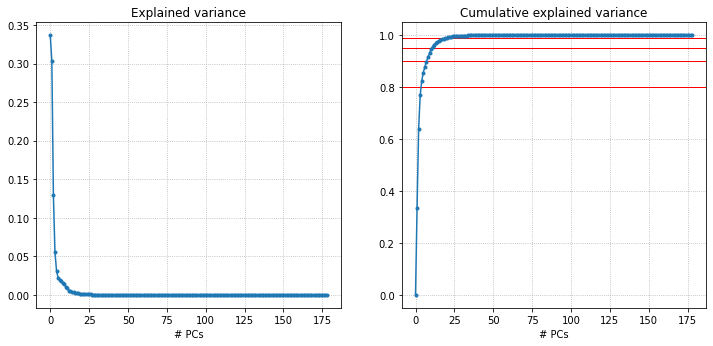

In [38]:
# plot EV/CEVs

fig = plt.figure(figsize=(12,5.25))

plt.subplot(121)
plt.title("Explained variance")
plt.xlabel("# PCs")
plt.grid(linestyle="dotted")
plt.plot(EV, "o-",linestyle = "-", markersize= 3.0)

plt.subplot(122)
plt.title("Cumulative explained variance")
plt.axhline(linewidth=1, y=0.99, color='r')
plt.axhline(linewidth=1, y=0.95, color='r')
plt.axhline(linewidth=1, y=0.9, color='r')
plt.axhline(linewidth=1, y=0.8, color='r')
plt.xlabel("# PCs")
plt.grid(linestyle="dotted")
plt.plot(CEV, "o-",markersize= 3.0)

In [39]:
sum(pca.explained_variance_ratio_[0:ev_num])

0.9910493187129852

## Fragment here is for testing . Ignore this.

In [744]:
# manual projection formula
# This would be needed for the inverse manual transform after the manifold learning
# and inverse kernel regression reconstruction
proj1 = np.dot(data_centered_np_o, chosen_ev.T)

In [745]:
proj1

array([[-0.15233025,  0.2125124 , -0.00612836, ...,  0.00287836,
        -0.00215817, -0.00415035],
       [-0.16197173, -0.08758274, -0.01822054, ..., -0.00951803,
        -0.00061325, -0.00421621],
       [-0.15970531, -0.22186946, -0.01824396, ...,  0.00350775,
        -0.00393539, -0.00741864],
       ...,
       [-0.07531961, -0.5441434 , -0.11227014, ..., -0.01949599,
        -0.00116305, -0.00619755],
       [-0.03387491,  0.18981409,  0.01463004, ...,  0.01733272,
        -0.00830437, -0.00217051],
       [-0.08965747, -0.14413832, -0.00702615, ...,  0.00310124,
         0.00564794,  0.00631433]])

In [746]:
proj1.shape

(14098, 20)

In [747]:
pca2 = PCA(n_components=ev_num)

In [752]:
# automatic projection formula
proj2 = pca2.fit_transform(numpy_o)

In [753]:
proj2

array([[-0.15233025,  0.2125124 , -0.00612836, ...,  0.00287846,
        -0.00215819, -0.0041502 ],
       [-0.16197173, -0.08758274, -0.01822054, ..., -0.00951806,
        -0.00061324, -0.00421625],
       [-0.15970531, -0.22186946, -0.01824396, ...,  0.00350786,
        -0.00393542, -0.00741849],
       ...,
       [-0.07531961, -0.5441434 , -0.11227014, ..., -0.01949591,
        -0.00116307, -0.00619744],
       [-0.03387491,  0.18981409,  0.01463004, ...,  0.01733271,
        -0.00830436, -0.00217052],
       [-0.08965747, -0.14413832, -0.00702615, ...,  0.00310236,
         0.00564791,  0.00631619]])

In [754]:
# check that the difference between the projections is close to zero,
# so the methods are performing the same transformation
np.max(proj1-proj2)

7.880332922538535e-06

In [758]:
np.max(proj1-proj)

2.220446049250313e-16

In [759]:
np.max(proj2-proj)

2.3431703683227112e-05

In [723]:
inverse = pca2.inverse_transform(proj2)

In [594]:
inverse

array([[-5.35260525e-04, -2.77528709e-05, -8.53441484e-06, ...,
         1.79742626e-08,  2.77493627e-06,  2.94364414e-08],
       [-8.65241630e-04, -3.80368265e-05, -1.48170350e-05, ...,
         9.24768014e-08,  1.20447808e-06,  1.64776244e-09],
       [-4.44127913e-04, -3.13742149e-05, -1.01716792e-05, ...,
         1.79024074e-07,  3.25570541e-06,  9.61141227e-08],
       ...,
       [-7.91354991e-04, -6.03205079e-05, -1.90413771e-05, ...,
         2.06664769e-07,  3.44433206e-07, -7.19510567e-08],
       [-5.88899120e-04, -6.53055816e-05,  3.44341351e-05, ...,
        -4.11169953e-08,  8.61318981e-06,  3.15872820e-08],
       [ 1.94010562e-03,  1.02586719e-04,  1.94194556e-05, ...,
         5.53911700e-08,  3.92806494e-06, -2.29643713e-08]])

In [739]:
numpy_o = genfromtxt('pivot_o.csv', delimiter=';', skip_header=1, usecols=range(1, dimension+1))

In [740]:
# check that numpy and pandas formats do not differ significantly
# numpy format is more suitable for computations, pandas for visual representation and formatting
# Also pandas format contains the bacteria marks of the data
np.max(np.max(numpy_o - data_o))

1.1102230246251565e-16

In [599]:
# manual inverse PCA transformation from chosen 99% variance principal components 

inverse2 = np.dot(proj1, chosen_ev) + mean_np_o

In [600]:
inverse2

array([[-5.35243384e-04, -2.77493798e-05, -8.53434986e-06, ...,
         1.79742141e-08,  2.77492061e-06,  2.94362922e-08],
       [-8.65249247e-04, -3.80376231e-05, -1.48170941e-05, ...,
         9.24768285e-08,  1.20448476e-06,  1.64783768e-09],
       [-4.44111759e-04, -3.13692600e-05, -1.01716369e-05, ...,
         1.79023989e-07,  3.25569262e-06,  9.61139478e-08],
       ...,
       [-7.91343672e-04, -6.03202660e-05, -1.90413084e-05, ...,
         2.06664772e-07,  3.44422435e-07, -7.19510977e-08],
       [-5.88903357e-04, -6.52988344e-05,  3.44341356e-05, ...,
        -4.11171749e-08,  8.61319753e-06,  3.15870694e-08],
       [ 1.94050886e-03,  1.02612299e-04,  1.94218269e-05, ...,
         5.53908566e-08,  3.92767243e-06, -2.29668138e-08]])

In [601]:
# Check that two variants of the inverse transformations are close and don't vary significantly
# That would be crucial for performing the inverse transform for the data reconstructed
# after manifold learning algorithms

np.max(inverse2 - inverse)

4.080435808200347e-05

In [741]:
# center the data
mean_np_o = np.mean(numpy_o, axis=0)
data_centered_np_o = numpy_o - mean_np_o

In [742]:
mean_np_o

array([5.10968270e-04, 2.71302020e-05, 1.16056038e-05, 1.87561094e-02,
       7.04880802e-04, 1.20600037e-05, 2.77426815e-04, 1.05884531e-08,
       9.28428793e-03, 3.63049274e-01, 1.50258333e-02, 4.65452240e-06,
       1.64618340e-02, 7.47548924e-06, 6.51684235e-03, 2.77572336e-06,
       1.75164158e-03, 7.58326892e-05, 6.84700613e-07, 3.84700596e-01,
       7.52334649e-03, 1.13634935e-05, 7.07057096e-06, 2.82593202e-03,
       4.93760858e-08, 4.64971903e-02, 1.03201038e-02, 1.16238484e-03,
       6.02968302e-03, 1.06447266e-03, 9.20992360e-05, 3.22916797e-04,
       2.11195281e-09, 4.54708401e-02, 5.24693456e-04, 2.01724437e-05,
       1.93418110e-03, 1.87839318e-06, 3.49375607e-05, 3.38816610e-03,
       1.19811220e-02, 4.91748589e-05, 3.43985844e-03, 5.43842117e-03,
       6.82289368e-03, 1.69261147e-04, 4.54066688e-05, 1.31334194e-04,
       5.95187443e-05, 4.18692058e-07, 4.13276195e-05, 6.60691955e-05,
       3.99960812e-04, 1.59370433e-03, 5.10360082e-05, 8.02275231e-04,
      

In [762]:
np.max(pca.mean_ - mean_np_o)

1.6653345369377348e-16

In [743]:
data_centered_np_o

array([[-5.10968270e-04, -2.71302020e-05, -1.16056038e-05, ...,
        -5.77836930e-08, -2.46109415e-06, -4.55458264e-08],
       [-5.10968270e-04, -2.71302020e-05, -1.16056038e-05, ...,
        -5.77836930e-08, -2.46109415e-06, -4.55458264e-08],
       [-5.10968270e-04, -2.71302020e-05, -1.16056038e-05, ...,
        -5.77836930e-08, -2.46109415e-06, -4.55458264e-08],
       ...,
       [-5.10968270e-04, -2.71302020e-05, -1.16056038e-05, ...,
        -5.77836930e-08, -2.46109415e-06, -4.55458264e-08],
       [-5.10968270e-04, -2.71302020e-05, -1.16056038e-05, ...,
        -5.77836930e-08, -2.46109415e-06, -4.55458264e-08],
       [-5.10968270e-04, -2.71302020e-05, -1.16056038e-05, ...,
        -5.77836930e-08, -2.46109415e-06, -4.55458264e-08]])

In [611]:
np.linalg.norm(inverse2 - data_centered_np_o)

63.65674099404679

## Fragment ended. Code below is a part of the working version of the Notebook

In [40]:
# reduce the dimensionality of the data

pca = PCA(n_components = ev_num)
proj = pca.fit_transform(data_o)

In [41]:
# display the projected data

proj

array([[-0.15233025,  0.2125124 , -0.00612836, ...,  0.00287845,
        -0.00215841, -0.00415001],
       [-0.16197173, -0.08758274, -0.01822054, ..., -0.00951807,
        -0.00061319, -0.00421628],
       [-0.15970531, -0.22186946, -0.01824396, ...,  0.00350786,
        -0.00393567, -0.00741826],
       ...,
       [-0.07531961, -0.5441434 , -0.11227014, ..., -0.01949591,
        -0.00116324, -0.00619727],
       [-0.03387491,  0.18981409,  0.01463004, ...,  0.01733272,
        -0.00830439, -0.00217048],
       [-0.08965747, -0.14413832, -0.00702615, ...,  0.00310199,
         0.00564757,  0.00631374]])

In [42]:
proj.shape

(14098, 20)

### Piece of the code below is to calculate inverse transform and check the error

In [44]:
# inverse transform calculation
inv = pca.inverse_transform(proj)

In [45]:
inv.shape

(14098, 179)

In [52]:
# error shows how much of the vector length is estimated by the PCA projection
errors = np.linalg.norm(data_o - inv, axis=1) / np.linalg.norm(data_o)

In [64]:
# display 5 maximal errors
errors[errors.argsort()][::-1][0:5]

array([0.01186782, 0.01090075, 0.01013285, 0.00978029, 0.00963578])

#### We see that the maximal 3 errors are 1.2%, 1.1%, 1%. All the next errors are less than 1%
#### So the number of eigenvalues is chosen right

 ### Piece ended

In [807]:
# store projected data for the O level

np.savetxt('proj_o.csv', proj, delimiter = ';')

# Now we would repeat all the steps for the F taxonomic level

In [808]:
# Applying standard PCA procedure from sklearn

pca = PCA()
pca.fit(data_f)

eigenvectors_f = pca.components_
eigenvalues_f = pca.explained_variance_

In [809]:
# define the sum of the eigenvalues from 1st to ith normalized - cumulative expected variance

def CEV_d(d, eigenvalues):
    eigenvalues_d_sum = 0
    for i in range(d):
        eigenvalues_d_sum += eigenvalues_f[i]
    return eigenvalues_d_sum / np.sum(eigenvalues)

In [811]:
# calculating the list of the EVs and CEVs
# evnum is the first eigenvalue having CEV more or equal to 0.99

EV = []
CEV = []
ev_num = -1

for i in range(data_f.shape[1]):
    EV.append(EV_i(i, pca.explained_variance_))
    CEV.append(CEV_d(i, pca.explained_variance_))
    if (ev_num == -1 and CEV[i] >= 0.99) :
        ev_num = i

In [812]:
print(ev_num)
print(eigenvalues_f[ev_num])

42
0.00014294268263355598


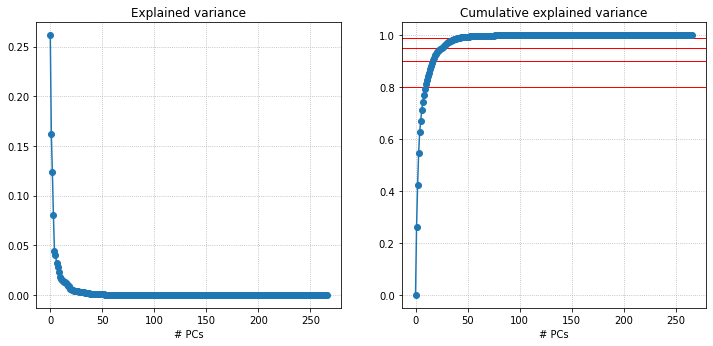

In [813]:
#plot EV/CEVs

fig = plt.figure(figsize=(12,5.25))

plt.subplot(121)
plt.title("Explained variance")
plt.xlabel("# PCs")
plt.grid(linestyle="dotted")
plt.plot(EV, "o-")

plt.subplot(122)
plt.title("Cumulative explained variance")
plt.axhline(linewidth=1, y=0.99, color='r')
plt.axhline(linewidth=1, y=0.95, color='r')
plt.axhline(linewidth=1, y=0.9, color='r')
plt.axhline(linewidth=1, y=0.8, color='r')
plt.xlabel("# PCs")
plt.grid(linestyle="dotted")
plt.plot(CEV, "o-")

In [814]:
# reduce the dimensionality of the data

pca = PCA(n_components = ev_num)
proj = pca.fit_transform(data_f)

In [815]:
# display the projected data

proj

array([[-5.52306200e-03, -2.21734034e-01, -3.65004573e-01, ...,
        -2.18877109e-03,  3.74378849e-04, -5.41398740e-04],
       [-8.80305866e-03, -1.59531720e-01, -2.67906383e-01, ...,
        -6.87772382e-03,  1.77548640e-03,  5.89458567e-03],
       [ 2.84424470e-01,  9.24015537e-02,  9.55367337e-02, ...,
         4.00920175e-04,  7.79741662e-04,  3.46817389e-03],
       ...,
       [-7.93059284e-02, -9.38510332e-02, -3.22381404e-01, ...,
        -3.83110743e-03,  2.11017375e-03,  6.93915131e-04],
       [ 2.44292876e-01,  1.07541471e-01,  1.14370174e-01, ...,
        -8.79108733e-03, -2.42248595e-03, -5.16567946e-03],
       [ 5.73109748e-02, -6.51060592e-02, -1.26680948e-01, ...,
        -4.15069637e-03,  3.46864525e-05,  9.42597991e-04]])

In [816]:
proj.shape

(14098, 42)

In [817]:
# store projected data for the F level

np.savetxt('proj_f.csv', proj, delimiter = ';')

# Now we would repeat all the steps for the G taxonomic level

In [818]:
# Applying standard PCA procedure from sklearn

pca = PCA()
pca.fit(data_g)

eigenvectors_g = pca.components_
eigenvalues_g = pca.explained_variance_

In [819]:
# define the sum of the eigenvalues from 1st to ith normalized - cumulative expected variance

def CEV_d(d, eigenvalues):
    eigenvalues_d_sum = 0
    for i in range(d):
        eigenvalues_d_sum += eigenvalues_g[i]
    return eigenvalues_d_sum / np.sum(eigenvalues)

In [820]:
# calculating the list of the EVs and CEVs
# evnum is the first eigenvalue having CEV more or equal to 0.99

EV = []
CEV = []
ev_num = -1

for i in range(data_g.shape[1]):
    EV.append(EV_i(i, pca.explained_variance_))
    CEV.append(CEV_d(i, pca.explained_variance_))
    if (ev_num == -1 and CEV[i] >= 0.99) :
        ev_num = i

In [821]:
print(ev_num)
print(eigenvalues_g[ev_num])

68
5.737187072326544e-05


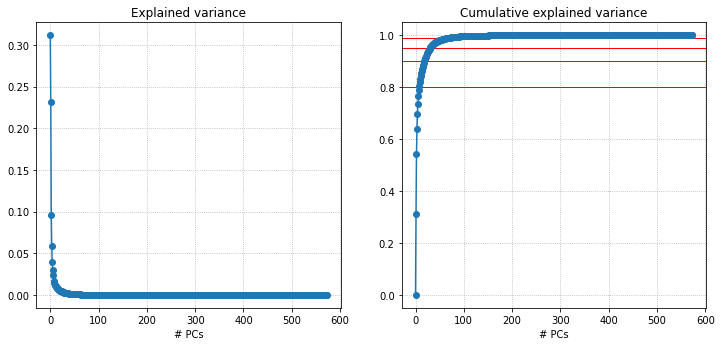

In [822]:
#plot EV/CEVs

fig = plt.figure(figsize=(12,5.25))

plt.subplot(121)
plt.title("Explained variance")
plt.xlabel("# PCs")
plt.grid(linestyle="dotted")
plt.plot(EV, "o-")

plt.subplot(122)
plt.title("Cumulative explained variance")
plt.axhline(linewidth=1, y=0.99, color='r')
plt.axhline(linewidth=1, y=0.95, color='r')
plt.axhline(linewidth=1, y=0.9, color='r')
plt.axhline(linewidth=1, y=0.8, color='r')
plt.xlabel("# PCs")
plt.grid(linestyle="dotted")
plt.plot(CEV, "o-")

In [823]:
# reduce the dimensionality of the data

pca = PCA(n_components = ev_num)
proj = pca.fit_transform(data_g)

In [824]:
proj.shape

(14098, 68)

In [825]:
# display the projected data

proj

array([[ 1.14195206e-01, -1.91648205e-02,  5.74712980e-02, ...,
         1.88520027e-04, -9.38123015e-05, -2.67311031e-04],
       [-4.67752138e-02,  4.70265412e-02,  1.11285613e-01, ...,
         1.01232710e-04, -3.00220635e-04,  2.46054021e-04],
       [ 1.66294728e-01, -1.84971514e-01, -5.93443976e-02, ...,
        -3.85754321e-04,  4.05959914e-04,  8.20427399e-05],
       ...,
       [-3.32869690e-01, -9.30243331e-02,  2.66369407e-02, ...,
        -1.21452978e-03, -1.07363496e-04, -5.30612711e-04],
       [ 2.71519704e-01, -1.10532497e-01, -2.18727884e-02, ...,
        -5.80977021e-04, -3.42292515e-04, -6.19184462e-04],
       [-1.19797392e-01, -1.42222114e-01, -1.83370169e-02, ...,
        -3.67985718e-04, -3.57928802e-04,  3.54831383e-04]])

In [829]:
# store projected data for the G level

np.savetxt('proj_g.csv', proj, delimiter = ';')

# End of the Notebook. Ignore the pieces below

## The code below checks which of the variants for interpretation of the  sci-kit PCA is correct. 
## Either PCA eigenvectors matrix with rows containing the eigenvectors or the variant with the same matrix containing columns as the eigenvectors (mathematical standard notation).
## Code below would check which transformation is spanning the desired projection.

## Spolier: natural variant with rows is correct (as documented in sci-kit code). So the eigenvectors matrix should be transposed to perform the correct transformation manually.

In [353]:
# two points are chosen as the rows of the 2 by 2 matrix: (1;-1) and (3;3)

example = np.array([[1,-1], [3,3]])

In [354]:
example

array([[ 1, -1],
       [ 3,  3]])

In [355]:
# centering the data
mean_example = np.mean(example, axis=0)
centered_example = example - mean_example

In [356]:
centered_example

array([[-1., -2.],
       [ 1.,  2.]])

In [358]:
# performing PCA and showing the components

pca_ex=PCA()
pca_ex.fit(example)
#pca_ex.components_

array([[ 0.4472136 ,  0.89442719],
       [-0.89442719,  0.4472136 ]])

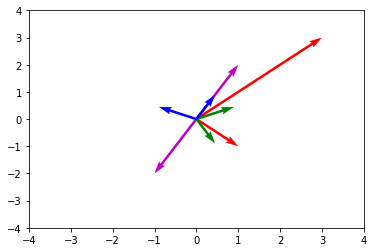

In [436]:
# red are the example poins
# magenta points are centered example points
# blue are the principal components as the rows of the matrix (natural variant, that is correct)
# green are the principal components as the columns of the matrix
# in two dimensions, centered points are always lying on the same line, incident with the 1st principal component
# note that you need to transpose matrix to plot the vectors correctly

plt.quiver([0, 0], [0, 0], example.T[0], example.T[1], angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver([0, 0], [0, 0], centered_example.T[0], centered_example.T[1], angles='xy', scale_units='xy', scale=1, color='m')
plt.quiver([0, 0], [0, 0], pca_ex.components_[0], pca_ex.components_[1], angles='xy', scale_units='xy', scale=1, color='g')
plt.quiver([0, 0], [0, 0], pca_ex.components_.T[0], pca_ex.components_.T[1], angles='xy', scale_units='xy', scale=1, color='b')

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

#### We see that the first component of the blue vector is lying on the same line as the centered vectors
#### So the natural variant, when the components_ matrix is enterpreted as the rows containing eigenvectors is correct

In [393]:
# the variant of the transformation, when the principal vectors are the columns

pr1 = np.dot(centered_example, pca_ex.components_[:,0])

In [378]:
pca_ex.components_

array([[ 0.4472136 ,  0.89442719],
       [-0.89442719,  0.4472136 ]])

In [392]:
pca_ex.components_[:,0]

array([ 0.4472136 , -0.89442719])

In [389]:
pca_ex.components_[0]

array([0.4472136 , 0.89442719])

In [408]:
# the variant of the transformation, when the principal vectors are the rows (correct one)

pr2 = np.dot(centered_example, pca_ex.components_[0].T)

In [394]:
pr1

array([ 1.34164079, -1.34164079])

In [409]:
pr2

array([-2.23606798,  2.23606798])

In [360]:
pca_ex.transform(example)

array([[-2.23606798e+00, -1.11022302e-16],
       [ 2.23606798e+00,  1.11022302e-16]])

In [405]:
np.outer(pr2, pca_ex.components_[0])  + mean_example

array([[ 1., -1.],
       [ 3.,  3.]])

In [412]:
np.outer(pr1, pca_ex.components_[:,0]) + mean_example

array([[ 2.6, -0.2],
       [ 1.4,  2.2]])

In [400]:
pca_ex2=PCA(n_components=1)
pca_ex2.fit(example)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [402]:
out = pca_ex2.transform(example)

In [403]:
pca_ex2.inverse_transform(out)

array([[ 1., -1.],
       [ 3.,  3.]])

In [507]:
example2 = np.array([[1,0, 0], [2,2, 2], [0, 0, 3]])

In [508]:
# centering the data
mean_example2 = np.mean(example2, axis=0)
centered_example2 = example2 - mean_example2

In [509]:
centered_example2

array([[ 0.        , -0.66666667, -1.66666667],
       [ 1.        ,  1.33333333,  0.33333333],
       [-1.        , -0.66666667,  1.33333333]])

In [510]:
pca_ex2=PCA()
pca_ex2.fit(example2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [511]:
pca_ex2.components_

array([[-3.16227766e-01, -7.77156117e-16,  9.48683298e-01],
       [ 5.88348405e-01,  7.84464541e-01,  1.96116135e-01],
       [-7.44208408e-01,  6.20173673e-01, -2.48069469e-01]])

In [512]:
example2

array([[1, 0, 0],
       [2, 2, 2],
       [0, 0, 3]])

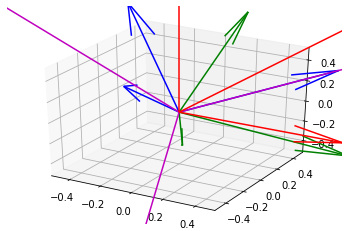

In [513]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(-0.5, 0.5)
ax.set_ylim3d(-0.5, 0.5)
ax.set_zlim3d(-0.5, 0.5)
ax.quiver(0, 0, 0, example2.T[0], example2.T[1], example2.T[2], length = 1, color='r')
ax.quiver(0, 0, 0, centered_example2.T[0], centered_example2.T[1], centered_example2.T[2], length = 1, color='m')
ax.quiver(0, 0, 0, pca_ex2.components_.T[0], pca_ex2.components_.T[1], pca_ex2.components_.T[2], length = 1, color='b')
ax.quiver(0, 0, 0, pca_ex2.components_[0], pca_ex2.components_[1], pca_ex2.components_[2], length = 1, color='g')

plt.show()

In [520]:
pr2_ex3 = np.dot(centered_example2, pca_ex2.components_[0:2].T)

In [521]:
pca_ex2.components_[0:2]

array([[-3.16227766e-01, -7.77156117e-16,  9.48683298e-01],
       [ 5.88348405e-01,  7.84464541e-01,  1.96116135e-01]])

In [522]:
pr2_ex3.shape

(3, 2)

In [523]:
np.dot(pr2_ex3, pca_ex2.components_[0:2]) + mean_example2

array([[ 1.00000000e+00, -1.11022302e-16, -2.22044605e-16],
       [ 2.00000000e+00,  2.00000000e+00,  2.00000000e+00],
       [-2.22044605e-16,  0.00000000e+00,  3.00000000e+00]])

In [527]:
pr1_ex3 = np.dot(centered_example2, pca_ex2.components_[:,0:2])

In [526]:
pca_ex2.components_[:,0:2]

array([[-3.16227766e-01, -7.77156117e-16],
       [ 5.88348405e-01,  7.84464541e-01],
       [-7.44208408e-01,  6.20173673e-01]])

In [529]:
np.dot(pr1_ex3, pca_ex2.components_[:,0:2].T) + mean_example2

array([[ 0.73180246, -0.05544302,  0.07013049],
       [ 0.93037698,  1.77888266,  2.27969378],
       [ 1.33782055,  0.27656036,  2.65017574]])

In [497]:
pca_ex3 = PCA(n_components=2)
pca_ex3.fit(example2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [498]:
out = pca_ex3.transform(example2)

In [499]:
out

array([[-1.58113883e+00, -8.49836586e-01],
       [-1.84657351e-15,  1.69967317e+00],
       [ 1.58113883e+00, -8.49836586e-01]])

In [500]:
pca_ex3.inverse_transform(out)

array([[ 1.00000000e+00, -1.11022302e-16, -2.22044605e-16],
       [ 2.00000000e+00,  2.00000000e+00,  2.00000000e+00],
       [-2.22044605e-16,  0.00000000e+00,  3.00000000e+00]])